> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating Economic Growth and Energy Consumption of the Fastest Developing Countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Among the 3 fastest growing countries, which energy resources do they need most compared to other countries' history of growth?
How does energy management change as countries encounter economic growth?

- is there a correlation between economic growth and energy consumption? 
    gdp_total_yearly vs energy_production_total
- which countries had the strongest growth over the last 30 years? which countries are expected the grow the most?
    gdp_total_yearly vs 
- energy use/production per person vs. GDP /employee/capita/etc?
- total GDP vs. public/private/total investment into energy resources?
- resource consumption distribution vs production/import/export

<a id='intro'></a>
## Introduction / Outline

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## GDP
- Yearly growth
- Next 10 years
- GDP per unit of energy use
- Resources
    - Production
        * hydro, natural gas, nuclear, oil, energy
    - Exports/Imports
        * fuel
        * Energy imports, net (% of energy use)

## Energy Consumption
- Energy use per GDP
- GDP per unit of energy use (PPP vs constant 2017 PPP?)
- Natural resources contribution to GDP
- Resources
    - Fossil fuel energy consumption
    - Energy use per capita
    - Electricity production from renewable excluding hydro
    

## Other
- public/private investment in energy vs GDP
- population growth
    - access to electricity
        * energy supply / person
        * residential energy use
    - consumption per person
        - coal, electricity, hydro, natural gas, nuclear, oil, total
    - production per person
- counter points?
- which countries grew the least?

## Which countries increased energy consumption over the last 50 years?

## Which countries developed economically the most over the last 50 years?

## Which countries are expected to grow the most economically over the next 10 years?
- compare line graphs of top countries consumption vs past energy booms in other countries (offset by 10-30 years?)

## Which countries invested more money into energy?
- proportionate to GDP

## What is the distribution of energy resource consumption categorized by type?
- Electricty
    - Coal
    - Renewable
    - Oil, gas, and coal
    - Nuclear
    - Natural gas
    - Hydroelectric
    - Coal
    - Combustible renewables and waste
    - Alternative and nuclear energy
    - Solid biofuels

## Which fast growing countries should invest into non-fossil fuel related resources?
- What does their current resource consumption distribution look like?

## Which countries have strong economic growth and consume less fossil fuels?

In [444]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [536]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# GDP Total, Yearly Growth (per capita)
gdp_total_yearly_growth = pd.read_csv('gdp_total_yearly_growth.csv')

#gdp_per_capita_growth_10_years = pd.read_csv('gdppercapita_growth_over_next_10_years.csv')

# Electric power consumption (kWh per capita)
electric_consumption_kWh = pd.read_csv('eg_use_elec_kh_pc.csv')

# Net energy imports (% of energy use)
energy_imports = pd.read_csv('eg_imp_cons_zs.csv')

# Renewable enegery consumption (% of total final energy consumption)
energy_consumption_renewable = pd.read_csv('eg_fec_rnew_zs.csv')

# Fossil fuel energy consumption (% of total)
energy_consumption_fossil_fuels = pd.read_csv('eg_use_comm_fo_zs.csv')

# 

In [537]:
energy_imports.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.4,48.0,45.20,41.70,23.70,33.30,16.30,12.3,13.8,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-375.0,-346.0,-335.00,-275.00,-275.00,-249.00,-213.00,-189.0,-177.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-760.0,-858.0,-885.00,-765.00,-704.00,-619.00,-590.00,-595.0,-541.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-18.2,-12.7,-6.23,-7.35,-1.07,3.22,6.14,12.7,13.0,NaN
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.5,70.8,73.20,68.10,64.70,67.30,72.70,72.0,71.3,NaN


In [380]:
gdp_total_yearly_growth.query('country == "United States"')

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
185,United States,3.82,3.56,0.263,1.86,4.02,3.83,2.9,-5.21,6.93,...,3.49,3.08,2.61,1.86,-0.392,-3.48,2.88,1.99,2.94,2.03


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [381]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Only want to view last 100 years - anything prior to 1910 will be deleted from data
for i, v in enumerate(gdp_total_yearly_growth.columns):
    if v < '1910':
        gdp_total_yearly_growth.drop([v], axis=1, inplace=True)



In [382]:
gdp_total_yearly_growth.tail()

,country,1910,1911,1912,1913,1914,1915,1916,1917,1918,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
189,Venezuela,3.270,7.050,3.420,15.600,-12.700,3.070,-5.630,16.800,-0.668,...,18.90,10.20,10.30,8.80,5.31,-3.18,-1.47,4.21,5.64,0.92
190,Vietnam,2.290,2.290,2.290,2.290,0.759,0.759,0.759,0.759,0.759,...,7.82,8.44,8.05,8.37,6.22,5.22,6.67,5.75,5.25,5.41
191,Yemen,0.453,0.453,0.453,0.453,0.856,0.856,0.856,0.856,0.856,...,3.63,4.26,3.18,3.35,3.66,3.88,7.81,-10.40,2.50,4.48
192,Zambia,1.610,1.610,2.050,2.050,5.150,5.150,5.150,5.150,5.150,...,6.18,5.22,6.20,6.31,6.01,6.10,7.11,6.60,7.04,5.85
193,Zimbabwe,0.823,0.823,0.823,0.823,0.823,0.823,0.823,0.823,0.823,...,-6.07,-6.04,-3.88,-4.14,-18.10,5.31,8.89,9.79,10.00,4.29


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which countries developed economically the most over the last 50 years?
#### GDP growth per capita
- United Arab Emirates
- Equatorial Guinea
- Qatar
- Gabon
- Oman
- Botswana
- South Korea
- Singapore
- Maldives
- Iraq

In [383]:
# Sum of all values between 1960 - 2013

last_50_years = gdp_total_yearly_growth.iloc[:, [0] + list(range(51, 105))] # descope data before 1960
last_50_years.sum(numeric_only=True, axis=1).describe()

count    194.000000
mean     210.930051
std       95.775242
min       26.859300
25%      158.078050
50%      199.194750
75%      242.275475
max      786.447000
dtype: float64

In [384]:
last_50_years.reset_index(drop=True,inplace=True)
last_50_years.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,3.37,0.645,1.49,1.60,1.70,2.00,0.745,2.48,3.30,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,8.40,4.000,6.51,6.55,6.50,6.66,6.690,6.63,6.40,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,6.87,-12.200,-18.90,25.70,4.25,5.91,-5.360,8.70,11.60,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,11.40,11.300,11.00,10.80,10.60,10.30,10.000,9.79,9.60,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,4.09,13.500,-2.59,5.29,11.30,7.58,5.820,5.80,-1.54,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


In [385]:
sum_since_1960 = last_50_years.sum(numeric_only=True, axis=1) # create list of sum
last_50_years['Sum'] = sum_since_1960 # add sum to last_50_years data frame

gdp_top_25_percent_sum = last_50_years.query('Sum >= 242.275475')
gdp_top_25_percent_sum = gdp_top_25_percent_sum.sort_values(by='Sum', ascending=False)
gdp_top_25_percent_sum.reset_index(drop=True,inplace=True)

<ipython-input-385-56c17312644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_50_years['Sum'] = sum_since_1960 # add sum to last_50_years data frame


In [386]:
gdp_top_25_percent = top_25_percent_sum.iloc[:, :-1]
gdp_top_25_percent.reset_index(drop=True,inplace=True)

In [387]:
# top 10 fastest growing countries
gdp_top_10_countries_sum = gdp_top_25_percent_sum.query('Sum >= 364.4728')
gdp_top_10_countries_sum

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Sum
0,United Arab Emirates,14.9000,18.30,20.800,21.30,20.000,18.200,16.40,15.80,17.30,...,15.80,21.10,16.40,13.90,0.107,6.47,7.28,4.080,2.99,786.44700
1,Equatorial Guinea,10.0000,9.33,11.200,14.80,15.400,14.300,5.18,8.01,4.47,...,9.78,1.25,13.10,12.30,-8.090,-1.32,4.98,3.190,-4.92,629.68500
2,Qatar,23.0000,24.30,25.300,25.70,25.400,24.800,24.20,23.80,23.70,...,16.90,28.20,20.70,18.00,13.300,23.90,15.50,2.420,-1.62,589.20140
3,Gabon,7.7000,14.20,14.200,14.30,14.300,14.400,-4.56,20.30,6.56,...,36.70,1.13,1.56,20.10,-8.050,25.10,-7.36,6.030,6.39,514.77170
4,Oman,6.1900,1.08,20.200,4.29,0.040,0.511,5.30,66.60,82.10,...,4.53,6.07,7.49,14.00,2.620,24.00,-10.10,3.830,3.69,470.31430
5,Botswana,3.2900,4.35,3.790,4.28,4.660,4.370,11.30,11.80,11.90,...,4.15,5.69,4.92,3.20,-4.580,7.11,5.09,4.100,3.79,438.44000
6,South Korea,-0.0845,4.60,0.712,12.80,7.930,4.620,12.40,5.66,11.40,...,3.23,3.83,5.00,-1.11,0.894,6.62,1.51,2.000,2.73,417.51150
7,Singapore,11.1000,14.30,0.134,9.28,0.425,11.800,10.70,12.20,14.00,...,6.88,7.71,7.47,2.76,1.010,15.60,4.66,0.740,3.27,417.08300
8,Maldives,4.8700,4.96,5.010,4.99,4.880,4.740,4.55,4.42,4.43,...,-5.14,19.20,9.91,12.00,-3.960,6.69,6.68,0.524,3.36,392.53700
9,Iraq,11.1000,11.10,4.630,-2.13,11.700,8.830,5.17,-2.33,17.80,...,3.32,9.27,1.82,6.80,5.260,6.34,7.62,10.300,4.21,364.47287


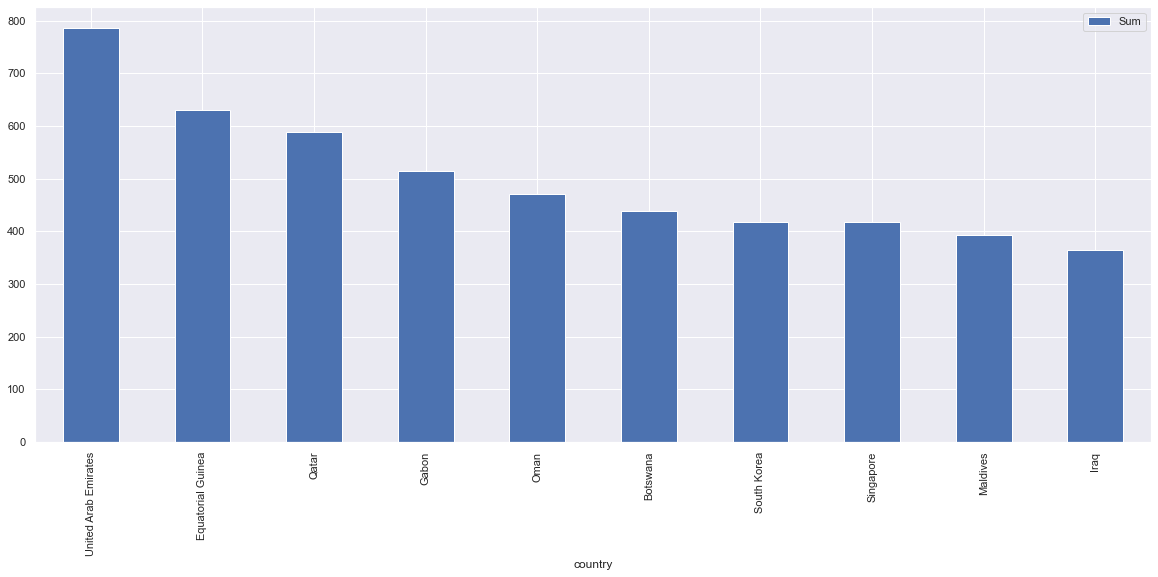

In [388]:
# greatest change in GDP per capita in PPP since 1960
gdp_top_10_countries_sum.plot(x='country', y='Sum', kind='bar', figsize=(20,8));

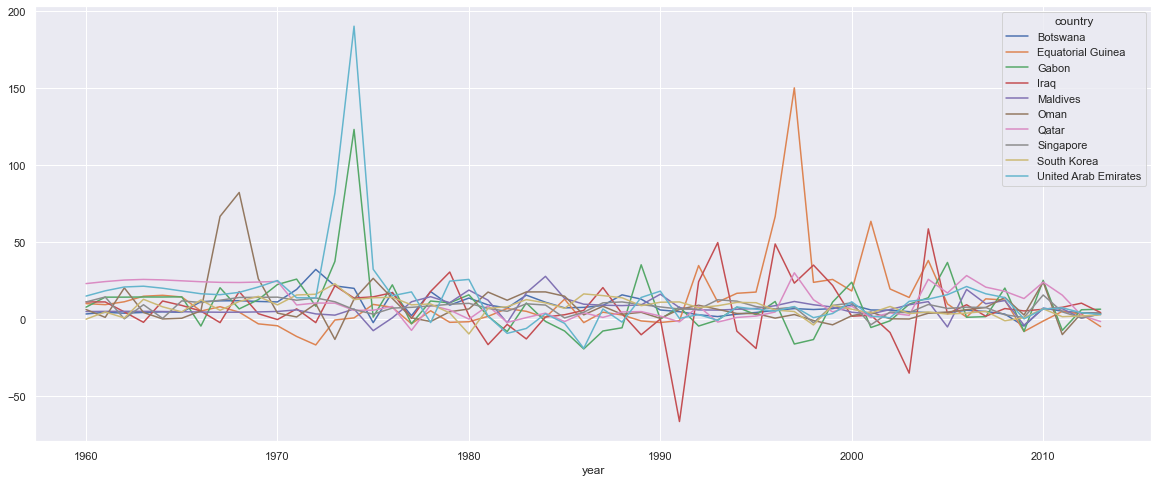

In [389]:
# spikes in economic growth
reshaped = pd.melt(gdp_top_10_countries, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(figsize=(20,8));

### Among the top 10 fastest growing countries, how has their energy consumption changed over the last 50 years?

In [394]:
# kWh per capita
kWh_consumption_per_capita = electric_consumption_kWh.iloc[:, :55] # cut off at 2014
kWh_consumption_per_capita.head()
#kWh_consumption_per_capita.sum(numeric_only=True, axis=1).describe()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1800.0,1720.0,1220.0,1210.0,1620.0,1840.0,1940.0,2210.0,2120.0,2530.0
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,804.0,891.0,862.0,894.0,947.0,866.0,1020.0,1120.0,1240.0,1280.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.5,109.0,145.0,133.0,172.0,189.0,206.0,207.0,219.0,280.0
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2290.0,2410.0,2370.0,2460.0,2770.0,2730.0,2880.0,2930.0,3000.0,2970.0
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1440.0,1520.0,1640.0,1770.0,1670.0,1660.0,1730.0,1810.0,1890.0,1930.0


In [442]:
'''new_df = pd.merge(top_10_countries, kWh_consumption_per_capita, on='kWh_consumption_per_capita')
top_10_countries_kWh = new_df['kWh_consumption_per_capita']'''

"new_df = pd.merge(top_10_countries, kWh_consumption_per_capita, on='kWh_consumption_per_capita')\ntop_10_countries_kWh = new_df['kWh_consumption_per_capita']"

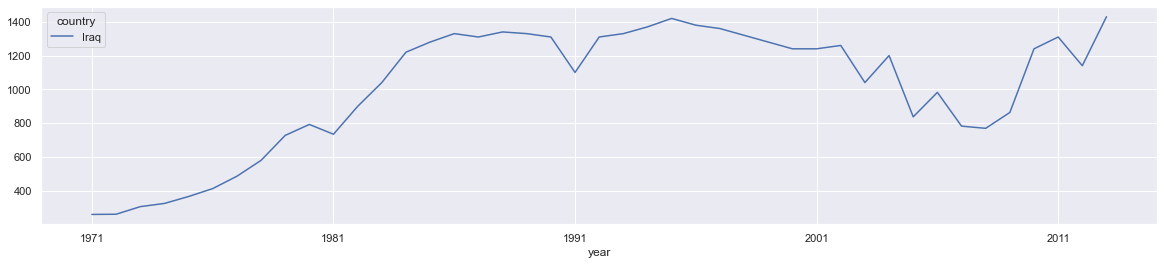

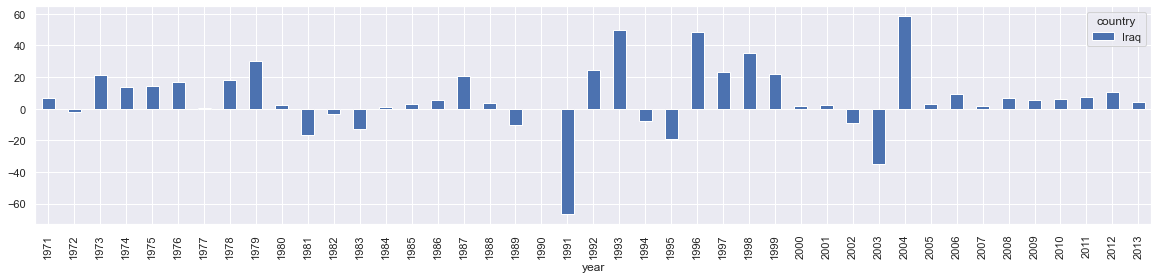

In [438]:
# IRAQ - kWh consumption per capita
iraq_kWh = kWh_consumption_per_capita.query('country == "Iraq"')
iraq_kWh = iraq_kWh.iloc[:, [0] + list(range(12, 55))]
iraq_kWh.reset_index(drop=True,inplace=True)
iraq_kWh

reshaped = pd.melt(iraq_kWh, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(figsize=(20,4));

# IRAQ - GDP growth per capita PPP
iraq_gdp = gdp_top_10_countries.query('country == "Iraq"')
iraq_gdp = iraq_gdp.iloc[:, [0] + list(range(12, 55))]

reshaped = pd.melt(iraq_gdp, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(kind="bar", figsize=(20,4));

In [435]:
#correlation coefficient?

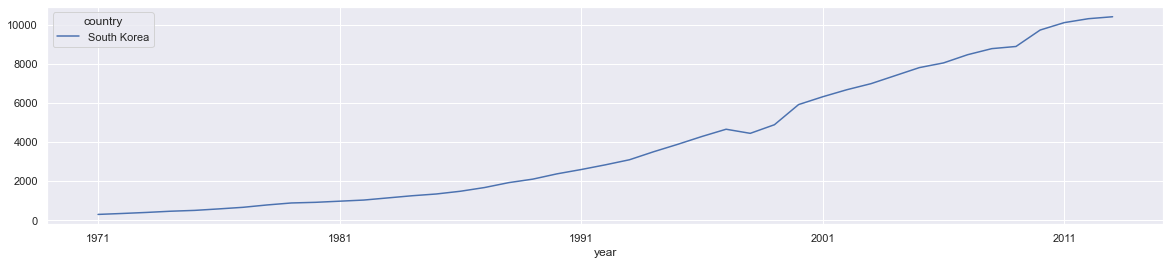

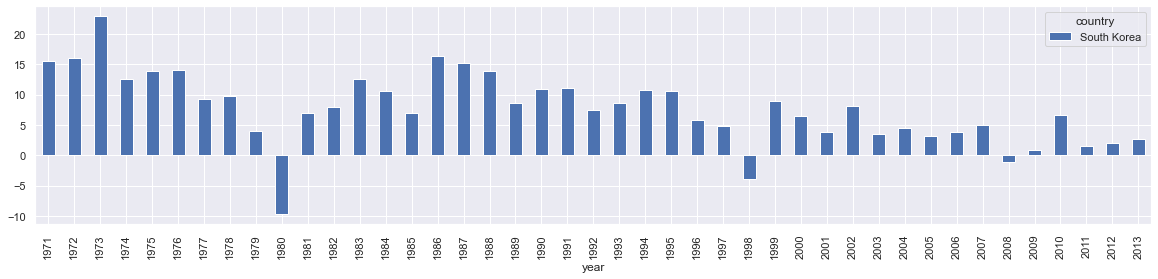

In [436]:
# South Korea - kWh consumption per capita
sk_kWh = kWh_consumption_per_capita.query('country == "South Korea"')
sk_kWh = sk_kWh.iloc[:, [0] + list(range(12, 55))]
sk_kWh.reset_index(drop=True,inplace=True)
sk_kWh

reshaped = pd.melt(sk_kWh, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(figsize=(20,4));

# South Korea - GDP growth per capita PPP
sk_gdp = gdp_top_10_countries.query('country == "South Korea"')
sk_gdp = sk_gdp.iloc[:, [0] + list(range(12, 55))]

reshaped = pd.melt(sk_gdp, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(kind="bar",figsize=(20,4));

### Which countries increased energy consumption over the last 50 years?
- What does their economic growth look like over the last 50 years?

In [512]:
# Top 10 countries with the largest change in kWh/capita between 1971 to 2013
kWh_consumption_delta = kWh_consumption_per_capita[['country', '1971', '2013']]
kWh_consumption_delta['delta'] = kWh_consumption_delta['2013'] - kWh_consumption_delta['1971']
top_10_countries_kWh_delta = kWh_consumption_delta.sort_values(by='delta', ascending=False).head(10)

top_10_countries_kWh_delta

<ipython-input-512-115e686e4db9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kWh_consumption_delta['delta'] = kWh_consumption_delta['2013'] - kWh_consumption_delta['1971']


,country,1971,2013,delta
52,Iceland,7000.0,54800.0,47800.0
8,Bahrain,1950.0,18700.0,16750.0
65,Kuwait,3020.0,15200.0,12180.0
100,Qatar,2640.0,13900.0,11260.0
41,Finland,4890.0,15500.0,10610.0
110,South Korea,296.0,10400.0,10104.0
128,United Arab Emirates,681.0,10700.0,10019.0
91,Norway,14100.0,23800.0,9700.0
103,Saudi Arabia,324.0,8780.0,8456.0
17,Brunei,1750.0,9870.0,8120.0


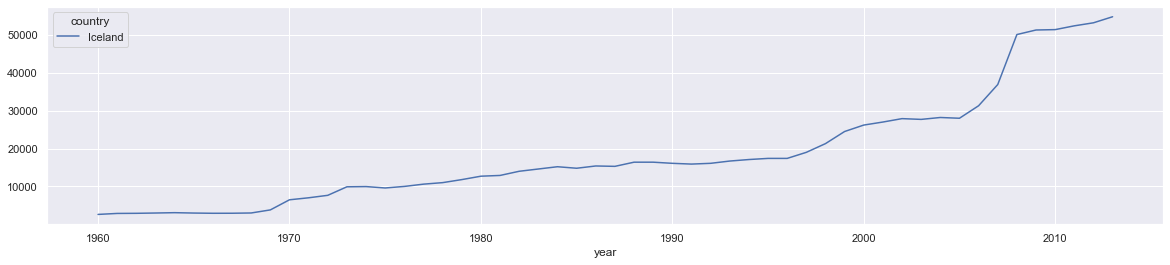

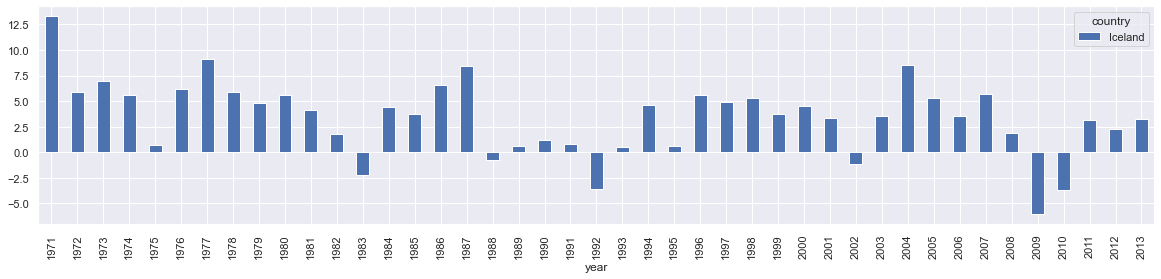

In [535]:
# Iceland - kWh consumption per capita
iceland_kWh = kWh_consumption_per_capita.query('country == "Iceland"')
iceland_kWh.reset_index(drop=True,inplace=True)
iceland_kWh

reshaped = pd.melt(iceland_kWh, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(figsize=(20,4));

# Iceland - GDP growth per capita PPP
iceland_gdp = last_50_years.query('country == "Iceland"')
iceland_gdp = iceland_gdp.iloc[:, [0] + list(range(12, 55))]

reshaped = pd.melt(iceland_gdp, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(kind="bar",figsize=(20,4));

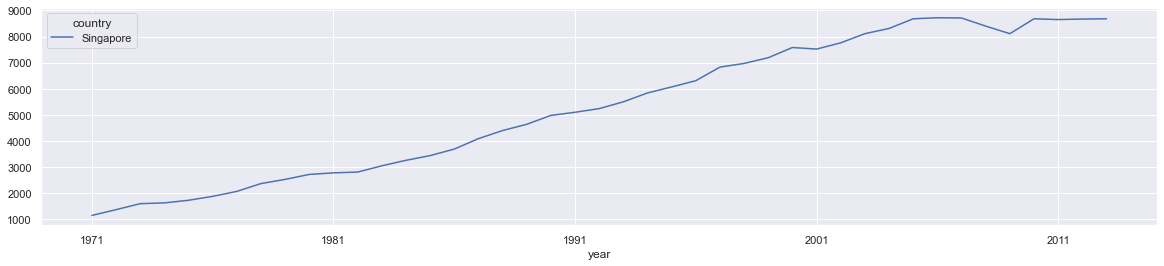

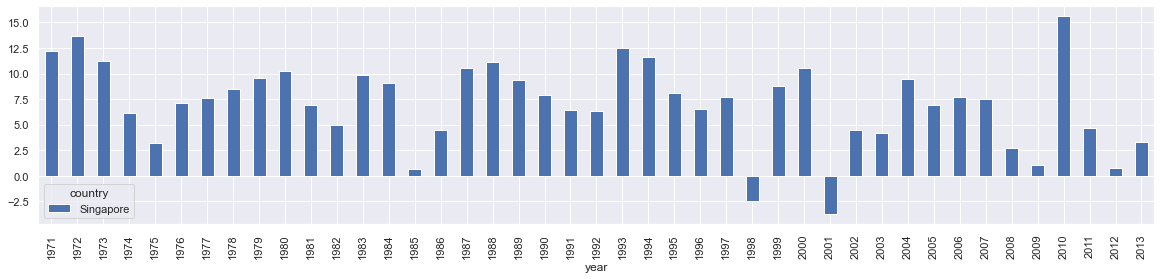

In [533]:
# Singapore - kWh consumption per capita
sg_kWh = kWh_consumption_per_capita.query('country == "Singapore"')
sg_kWh = sg_kWh.iloc[:, [0] + list(range(12,55))]
sg_kWh.reset_index(drop=True,inplace=True)
sg_kWh

reshaped = pd.melt(sg_kWh, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(figsize=(20,4));

# Singapore - GDP growth per capita PPP
sg_gdp = last_50_years.query('country == "Singapore"')
sg_gdp = sg_gdp.iloc[:, [0] + list(range(12, 55))]

reshaped = pd.melt(sg_gdp, id_vars=["country"], var_name="year")
df = reshaped.pivot(index='year', columns='country', values='value')
df.plot(kind="bar",figsize=(20,4));

### How are the top 10 fastest developing countries' energy resource consumption distribution look like?
- What did it look like 50 years ago? Now?
- How has it changed?

In [ ]:

energy_imports
energy_consumption_fossil_fuels
energy_consumption_renewable

### Among the top 25 developed countries, how has their energy resource consumption distribution changed over the last 50 years?
- What did it look like 50 years ago? Now?
- How has it changed?
- Any similarities between them? Maybe offset to developed countries during their fastest growth periods?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!